# Extra Group question

Stocks A, B, and C have prices 13.00, 29.00, and 18.40 and the state-contingent payoffs are as given in the table below:

  | Stock |  State 1 | State 2 | State 3 |
  | --- | --- | --- | --- |
  | A | 10| 10| 20 |
  | B | 20 | 30 | 40 |
  | C | 15 | 18 | 25 |

If the utility function for early consumption is $u(C)=\sqrt{C}$ and for 
  end-of-period consumption is $U(Q_s)=.9*\sqrt{Q_s}$ (for pure states $Q_1$,
  $Q_2$, and $Q_3$), find the optimal allocations to early consumption $C$ and late consumption $\{Q_s\}$ if the budget for total consumption is €10,000.   
  
  

In [1]:
using Ipopt, JuMP, Plots

In [2]:
Payoff = [10 10 20; 20 30 40; 15 18 25]
Price = [13 29 18.4]
Pure_Price = inv(Payoff)*Price'

sum_Pure_Prices = [1 1 1]*Pure_Price
# Sum of pure prices is 0.9 so renormalising will cancel the 0.9 in the EOP-consumption

1×1 Matrix{Float64}:
 0.8999999999999999

In [3]:
# Maximise utility subject to wealth constraint
opt=Model(Ipopt.Optimizer)
@variable(opt, Q[1:3]>=0)
@variable(opt, C>=0)
@constraint(opt, C+Pure_Price[1]*Q[1]+Pure_Price[2]*Q[2]+Pure_Price[3]*Q[3]==10000)
@NLobjective(opt, Max, sqrt(C)+
    (Pure_Price[1]*sqrt(Q[1])+Pure_Price[2]*sqrt(Q[2])+Pure_Price[3]*sqrt(Q[3])))
set_silent(opt)
optimize!(opt)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [4]:
Q = value.(Q)

3-element Vector{Float64}:
 5263.165040160799
 5263.161031971498
 5263.1585617800965

In [5]:
# Get Early Consumption
C = value.(C)

5263.155257664353

In [6]:
# Calculate End-of-Period Consumption
C1 = value.(Q)'*Pure_Price*1/sum_Pure_Prices

1×1 adjoint(::Vector{Float64}) with eltype Float64:
 5263.160824817386

In [7]:
# Calculate Expected Utility
sqrt(C).+(Pure_Price/sum_Pure_Prices)'*sqrt.(Q)

1-element Vector{Float64}:
 145.09525204141386

**Total early consumption:** €5263.155

**Total end-of-period consumption:** €5263.161

In [8]:
# Create plot of  
Q = range(1,11111)
C = 10000 .-sum_Pure_Prices.*Q
U_Q = zeros(11111)
for i in 1:length(U_Q)
    U_Q[i,:] = sqrt.(C[i]).+(Pure_Price)'*sqrt.(repeat([Q[i]],1,3))'
end

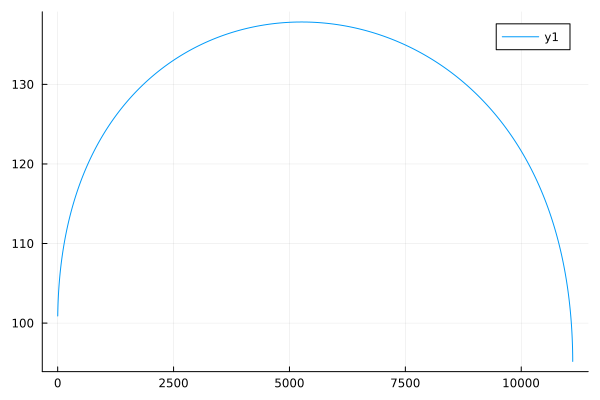

In [9]:
plot(U_Q)

In [10]:
# Index number will line up with amount of future consumption
index = findall(x -> x .== maximum(U_Q), U_Q)

1-element Vector{Int64}:
 5263